In [58]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_adj
from pathlib import Path
import xarray as xr

In [59]:
# tell Python to use the ecco_v4_py in the 'ECCOv4-py' repository
from os.path import join,expanduser
import sys

# identify user's home directory
user_home_dir = expanduser('~')

# import the ECCOv4 py library 
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

In [60]:
# load grid info
grid_dir     = Path('/home/jovyan/efs_ecco/ECCO/V4/r5/netcdf/native/geometry/')
ds_grid      = xr.open_dataset(grid_dir / 'GRID_GEOMETRY_ECCO_V4r5_native_llc0090.nc')

In [61]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_adj_302_302_3_mask3d.0.0_0.0_-69.0_-61.0_50.0_0.0_1/",
                            ctrl_num_list=[1, 2, 3, 4, 5, 6, 7, 8],
                            lag_beg=0, lag_end=1000000);

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_adj_302_302_3_mask3d.0.0_0.0_-69.0_-61.0_50.0_0.0_1/

Reading /efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_adj_302_302_3_mask3d.0.0_0.0_-69.0_-61.0_50.0_0.0_1

Reading Adjoint Tool output ... 

Found file: adxx_empmr.0000000129.data

*********************************************
Read adjoint gradient for empmr
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_adj_302_302_3_mask3d.0.0_0.0_-69.0_-61.0_50.0_0.0_1/output/adxx_empmr.0000000129.data
 
Zero lag at (week/record) = 1314
Max  lag at (week/record) = 1201
Specified start and end files #: 0 and 1000000

*********************************************
Outputting adxx_empmr

Found file: adxx_pload.0000000129.data

*********************************************
Read adjoint gradien

In [10]:
globals_dict['return_vars'].keys()

dict_keys(['adxx_empmr_filename', 'adxx_empmr', 'adxx_empmr_lag0', 'adxx_empmr_lagmax', 'adxx_empmr_lag_beg', 'adxx_empmr_lag_end', 'adxx_pload_filename', 'adxx_pload', 'adxx_pload_lag0', 'adxx_pload_lagmax', 'adxx_pload_lag_beg', 'adxx_pload_lag_end', 'adxx_qnet_filename', 'adxx_qnet', 'adxx_qnet_lag0', 'adxx_qnet_lagmax', 'adxx_qnet_lag_beg', 'adxx_qnet_lag_end', 'adxx_qsw_filename', 'adxx_qsw', 'adxx_qsw_lag0', 'adxx_qsw_lagmax', 'adxx_qsw_lag_beg', 'adxx_qsw_lag_end', 'adxx_saltflux_filename', 'adxx_saltflux', 'adxx_saltflux_lag0', 'adxx_saltflux_lagmax', 'adxx_saltflux_lag_beg', 'adxx_saltflux_lag_end', 'adxx_spflx_filename', 'adxx_spflx', 'adxx_spflx_lag0', 'adxx_spflx_lagmax', 'adxx_spflx_lag_beg', 'adxx_spflx_lag_end', 'adxx_tauu_filename', 'adxx_tauu', 'adxx_tauu_lag0', 'adxx_tauu_lagmax', 'adxx_tauu_lag_beg', 'adxx_tauu_lag_end', 'adxx_tauv_filename', 'adxx_tauv', 'adxx_tauv_lag0', 'adxx_tauv_lagmax', 'adxx_tauv_lag_beg', 'adxx_tauv_lag_end'])

In [28]:
tmp_adxx_c=globals_dict['return_vars']['adxx_qnet']

In [29]:
tmp_adxx =ecco.llc_compact_to_tiles(tmp_adxx_c, less_output=True)

In [17]:
tmp_adxx.shape

(114, 13, 90, 90)

Text(0.5, 0.98, 'Perfect figure')

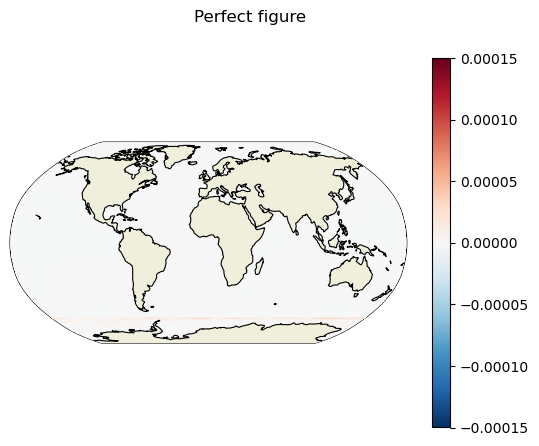

In [63]:
colorm = 'RdBu_r'
fig = ecco.plot_proj_to_latlon_grid(ds_grid.XC, ds_grid.YC, tmp_adxx[0],
                            plot_type = 'contourf',
                            show_colorbar=True,dx=1, dy=1, cmin=-1.5e-4, cmax=1.5e-4,
                            colormap=colorm,show_coastline=True,show_tile_labels = '1992 jan');
fig[0].suptitle('Perfect figure')

Lag at week 0


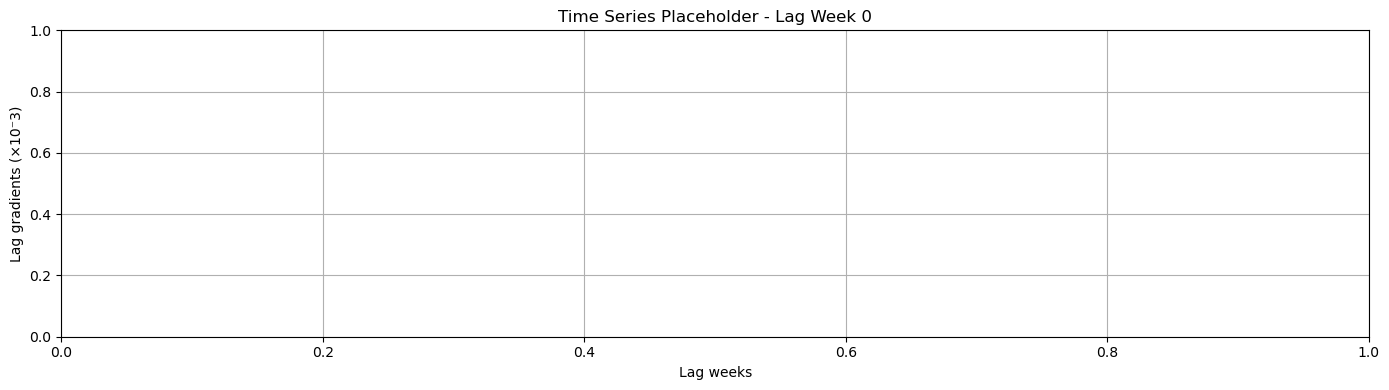

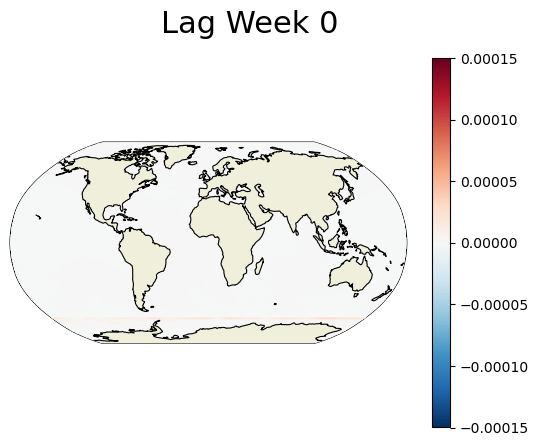

Lag at week 1


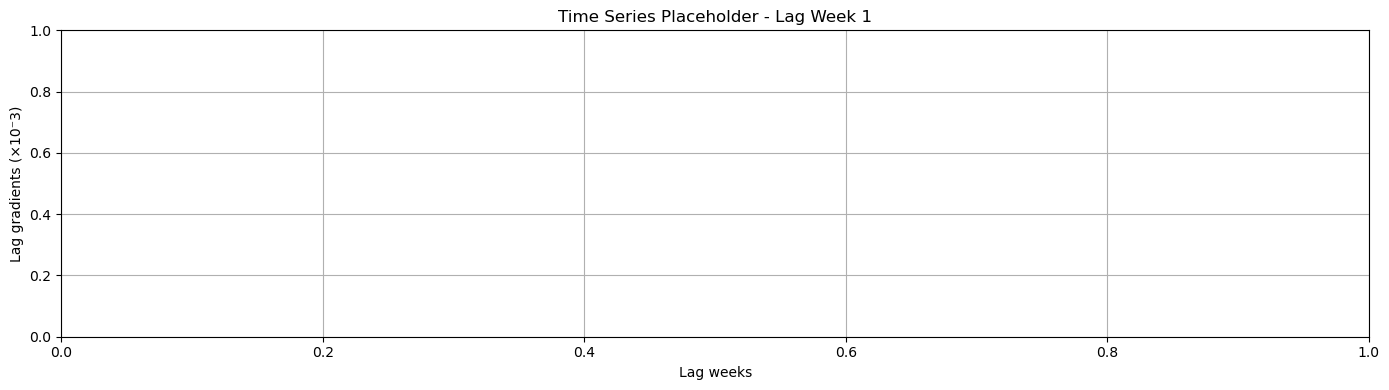

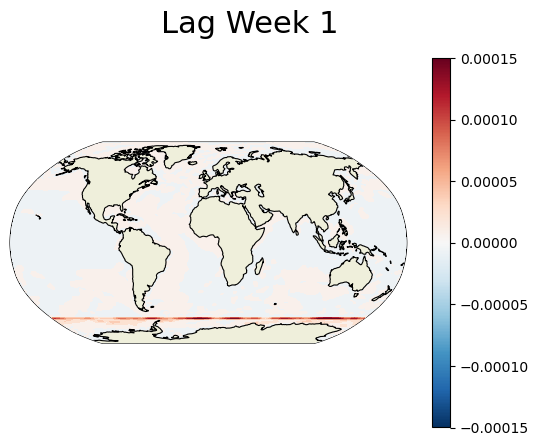

Lag at week 2


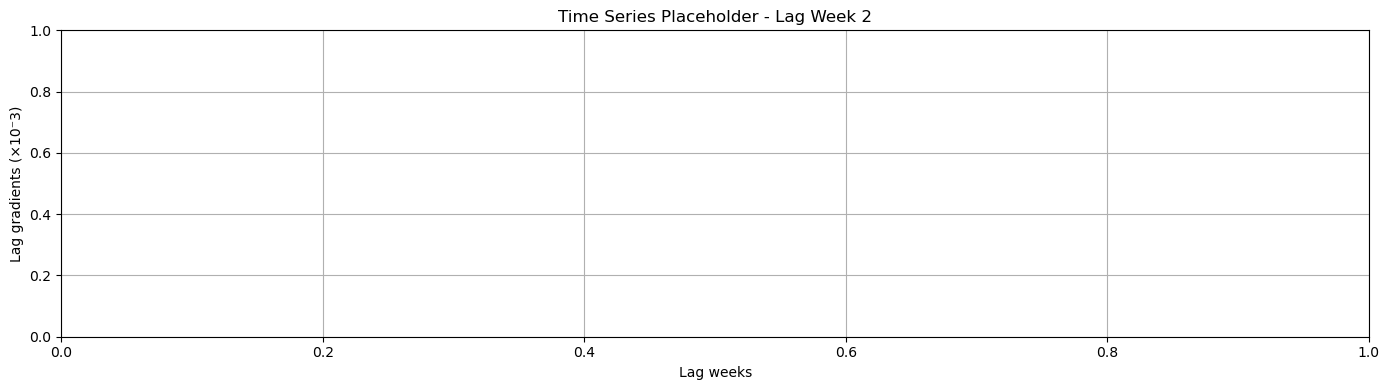

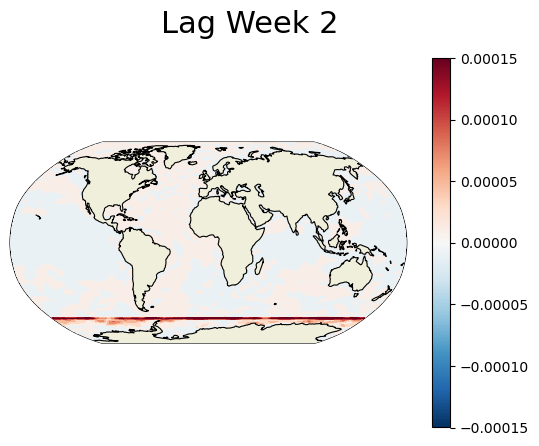

Lag at week 3


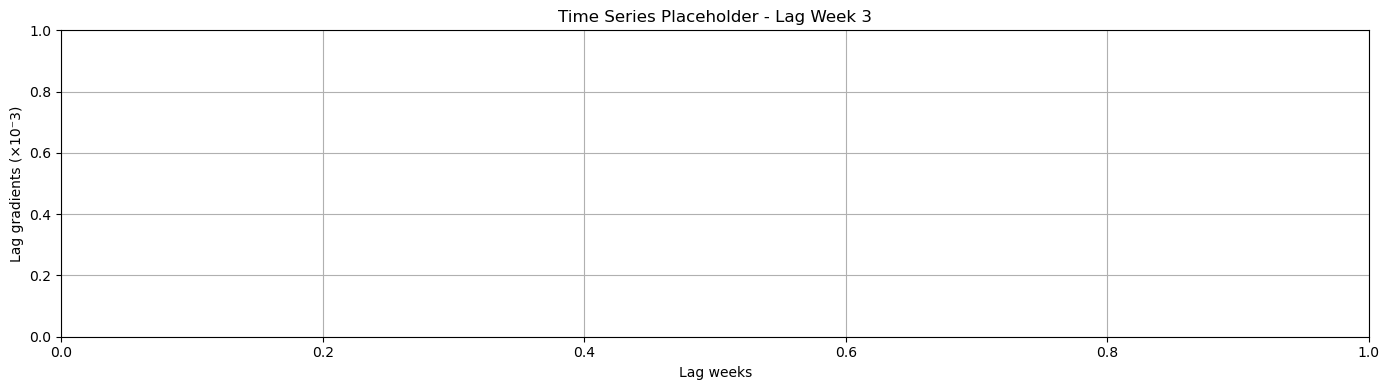

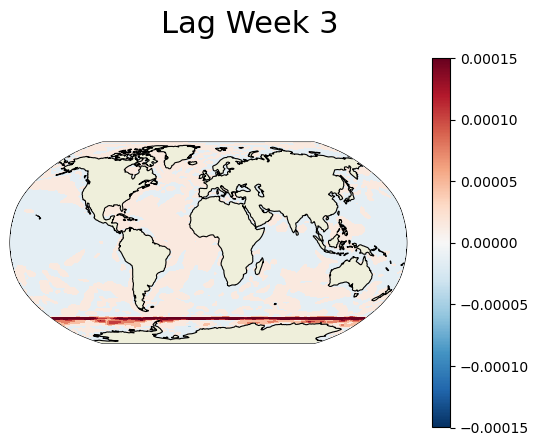

Lag at week 4


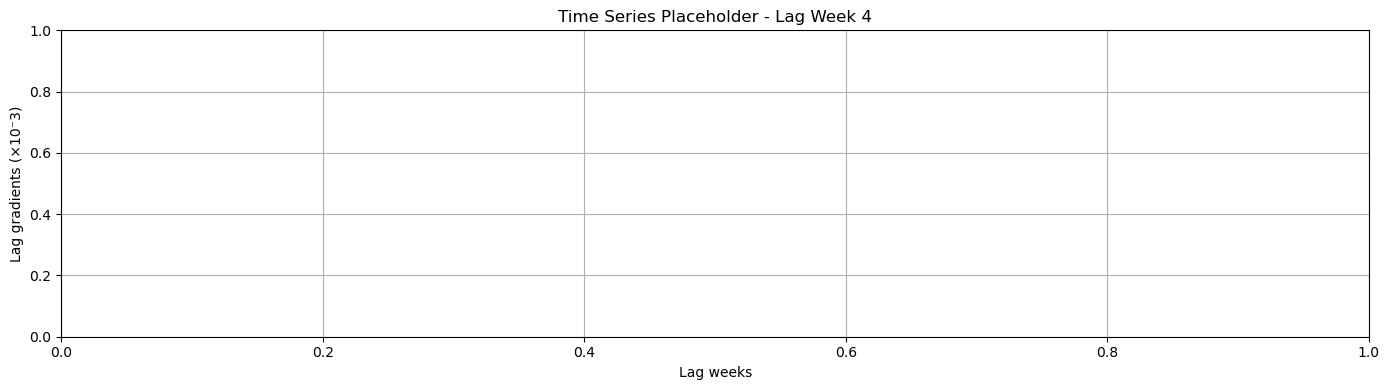

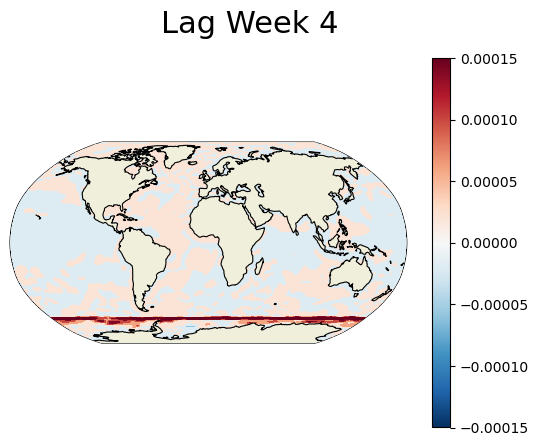

In [73]:
for ts in range(0, 5):
    print(f'Lag at week {ts}')

    # --- Figure 1: Custom time series or metadata ---
    fig1 = plt.figure(figsize=(14, 4))
    ax0 = fig1.add_subplot(1, 1, 1)
    ax0.set_title(f'Time Series Placeholder - Lag Week {ts}')
    ax0.set_xlabel('Lag weeks')
    ax0.set_ylabel('Lag gradients (×10⁻3)')
    ax0.grid(True)
    fig1.tight_layout()
    plt.show()

    # --- Figure 2: ECCO-provided map plot (Robinson) ---
    fig2 = ecco.plot_proj_to_latlon_grid(
        ds_grid.XC,
        ds_grid.YC,
        tmp_adxx[ts],
        plot_type='contourf',
        show_colorbar=True,
        dx=1,
        dy=1,
        cmin=-1.5e-4,
        cmax=1.5e-4,
        colormap=colorm,
        show_coastline=True
    )

    fig2[0].suptitle(f'Lag Week {ts}', fontsize=22)
    plt.show()